
# Pulsar Star Classification

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
from matplotlib import pyplot as plt
from graphviz import Source
from IPython.display import SVG

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import keras
import tensorflow
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import joblib
from keras.models import save_model

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train1 = df_train.copy()
df_test1 = df_test.copy()

## Data Shape

In [3]:
df_train.shape

(12528, 9)

In [4]:
df_test.shape

(5370, 9)

### Data Characteristics

In [5]:
df_train.head()

Mean of the integrated profile  \
0                       121.156250   
1                        76.968750   
2                       130.585938   
3                       156.398438   
4                        84.804688   

    Standard deviation of the integrated profile  \
0                                      48.372971   
1                                      36.175557   
2                                      53.229534   
3                                      48.865942   
4                                      36.117659   

    Excess kurtosis of the integrated profile  \
0                                    0.375485   
1                                    0.712898   
2                                    0.133408   
3                                   -0.215989   
4                                    0.825013   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.013165                   3.168896   
1                             3.388719                   2.399666   
2                            -0.297242                   2.743311   
3                            -0.171294                  17.471572   
4                             3.274125                   2.790134   

    Standard deviation of the DM-SNR curve  \
0                                18.399367   
1                                17.570997   
2                                22.362553   
3                                      NaN   
4                                20.618009   

    Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
0                              7.449874                      65.159298   
1                              9.414652                     102.722975   
2                              8.508364                      74.031324   
3                              2.958066                       7.197842   
4                              8.405008                      76.291128   

   target_class  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [6]:
df_test.head()

Mean of the integrated profile  \
0                       116.906250   
1                        75.585938   
2                       103.273438   
3                       101.078125   
4                       113.226562   

    Standard deviation of the integrated profile  \
0                                      48.920605   
1                                      34.386254   
2                                      46.996628   
3                                      48.587487   
4                                      48.608804   

    Excess kurtosis of the integrated profile  \
0                                    0.186046   
1                                    2.025498   
2                                    0.504295   
3                                    1.011427   
4                                    0.291538   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.129815                   3.037625   
1                             8.652913                   3.765050   
2                             0.821088                   2.244983   
3                             1.151870                  81.887960   
4                             0.292120                   6.291806   

    Standard deviation of the DM-SNR curve  \
0                                17.737102   
1                                21.897049   
2                                15.622566   
3                                81.464136   
4                                26.585056   

    Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
0                              8.122621                      78.813405   
1                              7.048189                      55.878791   
2                              9.330498                     105.134941   
3                              0.485105                      -1.117904   
4                              4.540138                      21.708268   

   target_class  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

### Information about all the columns

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                5370 non-null   float64
 1    Standard deviation of the integrated profile  5370 non-null   float64
 2    Excess kurtosis of the integrated profile     4603 non-null   float64
 3    Skewness of the integrated profile            5370 non-null   float64
 4    Mean of the DM-SNR curve                      5370 non-null   float64
 5    Standard deviation of the DM-SNR curve        4846 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           5370 non-null   float64
 7    Skewness of the DM-SNR curve                  5126 non-null   float64
 8   target_class                                   0 non-null      float64
dtypes: float64(9)
memory usage: 377.7 KB


* All the columns are of float data type
* Target column in testing data is null because we have to predict it

### Dataset Metrics

In [9]:
df_train.describe()

Mean of the integrated profile  \
count                     12528.000000   
mean                        111.041841   
std                          25.672828   
min                           5.812500   
25%                         100.871094   
50%                         115.183594   
75%                         127.109375   
max                         189.734375   

        Standard deviation of the integrated profile  \
count                                   12528.000000   
mean                                       46.521437   
std                                         6.801077   
min                                        24.772042   
25%                                        42.362222   
50%                                        46.931022   
75%                                        50.979103   
max                                        91.808628   

        Excess kurtosis of the integrated profile  \
count                                10793.000000   
mean                                     0.478548   
std                                      1.064708   
min                                     -1.738021   
25%                                      0.024652   
50%                                      0.223678   
75%                                      0.473125   
max                                      8.069522   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                         12528.000000               12528.000000   
mean                              1.778431                  12.674758   
std                               6.208450                  29.613230   
min                              -1.791886                   0.213211   
25%                              -0.188142                   1.910535   
50%                               0.203317                   2.792642   
75%                               0.932374                   5.413253   
max                              68.101622                 222.421405   

        Standard deviation of the DM-SNR curve  \
count                             11350.000000   
mean                                 26.351318   
std                                  19.610842   
min                                   7.370432   
25%                                  14.404353   
50%                                  18.412402   
75%                                  28.337418   
max                                 110.642211   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                          12528.000000                   11903.000000   
mean                               8.333489                     105.525779   
std                                4.535783                     107.399585   
min                               -3.139270                      -1.976976   
25%                                5.803063                      35.199899   
50%                                8.451097                      83.126301   
75%                               10.727927                     139.997850   
max                               34.539844                    1191.000837   

       target_class  
count  12528.000000  
mean       0.092034  
std        0.289085  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [10]:
df_test.describe()

Mean of the integrated profile  \
count                      5370.000000   
mean                        111.168917   
std                          25.608635   
min                           6.179688   
25%                         101.041016   
50%                         114.757812   
75%                         127.023438   
max                         192.617188   

        Standard deviation of the integrated profile  \
count                                    5370.000000   
mean                                       46.615074   
std                                         6.940638   
min                                        24.791612   
25%                                        42.408020   
50%                                        47.031304   
75%                                        51.133444   
max                                        98.778911   

        Excess kurtosis of the integrated profile  \
count                                 4603.000000   
mean                                     0.483676   
std                                      1.076893   
min                                     -1.876011   
25%                                      0.030643   
50%                                      0.227314   
75%                                      0.475056   
max                                      7.608370   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                          5370.000000                5370.000000   
mean                              1.751260                  12.473587   
std                               6.072820                  29.145134   
min                              -1.764717                   0.213211   
25%                              -0.189557                   1.956522   
50%                               0.186468                   2.830686   
75%                               0.918807                   5.590301   
max                              65.385974                 223.392141   

        Standard deviation of the DM-SNR curve  \
count                              4846.000000   
mean                                 26.425371   
std                                  19.384489   
min                                   7.370432   
25%                                  14.555826   
50%                                  18.549670   
75%                                  28.681787   
max                                 109.712649   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                           5370.000000                    5126.000000   
mean                               8.233724                     102.869088   
std                                4.435683                     104.748418   
min                               -2.721857                      -1.964998   
25%                                5.700461                      33.817330   
50%                                8.383695                      81.392046   
75%                               10.632265                     136.893502   
max                               34.539844                    1191.000837   

       target_class  
count           0.0  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

## Null Values

In [11]:
pd.concat([df_train.isnull().sum(), np.round((df_train.isnull().sum()/df_train.shape[0])*100)], axis=1)

0     1
 Mean of the integrated profile                   0   0.0
 Standard deviation of the integrated profile     0   0.0
 Excess kurtosis of the integrated profile     1735  14.0
 Skewness of the integrated profile               0   0.0
 Mean of the DM-SNR curve                         0   0.0
 Standard deviation of the DM-SNR curve        1178   9.0
 Excess kurtosis of the DM-SNR curve              0   0.0
 Skewness of the DM-SNR curve                   625   5.0
target_class                                      0   0.0

In [12]:
pd.concat([df_test.isnull().sum(), np.round((df_test.isnull().sum()/df_test.shape[0])*100)], axis=1)

0      1
 Mean of the integrated profile                   0    0.0
 Standard deviation of the integrated profile     0    0.0
 Excess kurtosis of the integrated profile      767   14.0
 Skewness of the integrated profile               0    0.0
 Mean of the DM-SNR curve                         0    0.0
 Standard deviation of the DM-SNR curve         524   10.0
 Excess kurtosis of the DM-SNR curve              0    0.0
 Skewness of the DM-SNR curve                   244    5.0
target_class                                   5370  100.0

For Training Set 
1. Excess kurtosis of the integrated profile: 	__1735 &rarr; 14%__
2. Standard deviation of the DM-SNR curve: 	    __1178 &rarr; 9%__
3. Skewness of the DM-SNR curve: 	            __625 &rarr; 5%__

For Testing Set 
1. Excess kurtosis of the integrated profile: 	__767 &rarr; 14%__
2. Standard deviation of the DM-SNR curve: 	    __524 &rarr; 9%__
3. Skewness of the DM-SNR curve: 	            __244 &rarr; 5%__
<br>We will not consider 'target_class' as it is to be predicted.

## Target Class Distribution

In [13]:
df_train.target_class.value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

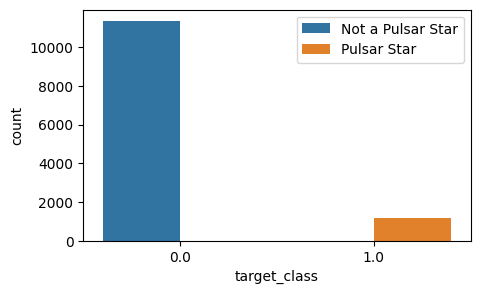

In [14]:
plt.figure(figsize=(5,3))
sns.countplot(df_train, x='target_class', hue='target_class')
plt.legend(labels=['Not a Pulsar Star','Pulsar Star'])

Data is highly imbalanced with 11375 non pulsars and only 1153 pulsar stars. We need to perform SMOTE transformation to mitigate this imbalance.

## Outliers

### Detecting Outliers

In [15]:
def get_outliers_using_iqr(data, column, threshold=1.5):
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < (Q1 - threshold * IQR)) | (data[column] > (Q1 + threshold * IQR))]
    return outliers

In [16]:
def plot_outliers(data, columns=[]):
    rows = 5
    cols = 3
    f, ax = plt.subplots(rows, cols, figsize=(20,30))
    for i in range(rows):
        for j in range(cols):
            col = i+j
            outliers = get_outliers_using_iqr(data, columns[col])
            df_red = outliers[columns[col]].copy()
            sns.scatterplot(x=data[columns[col]].index, y=data[columns[col]].values, ax=ax[i, j])
            sns.scatterplot(x=df_red.index, y=df_red.values, c='red', ax=ax[i, j], marker='X')
            ax[i, j].set_xlabel(columns[col])
    
    plt.show()

#### Training Data

<Axes: title={'center': 'Outliers'}>

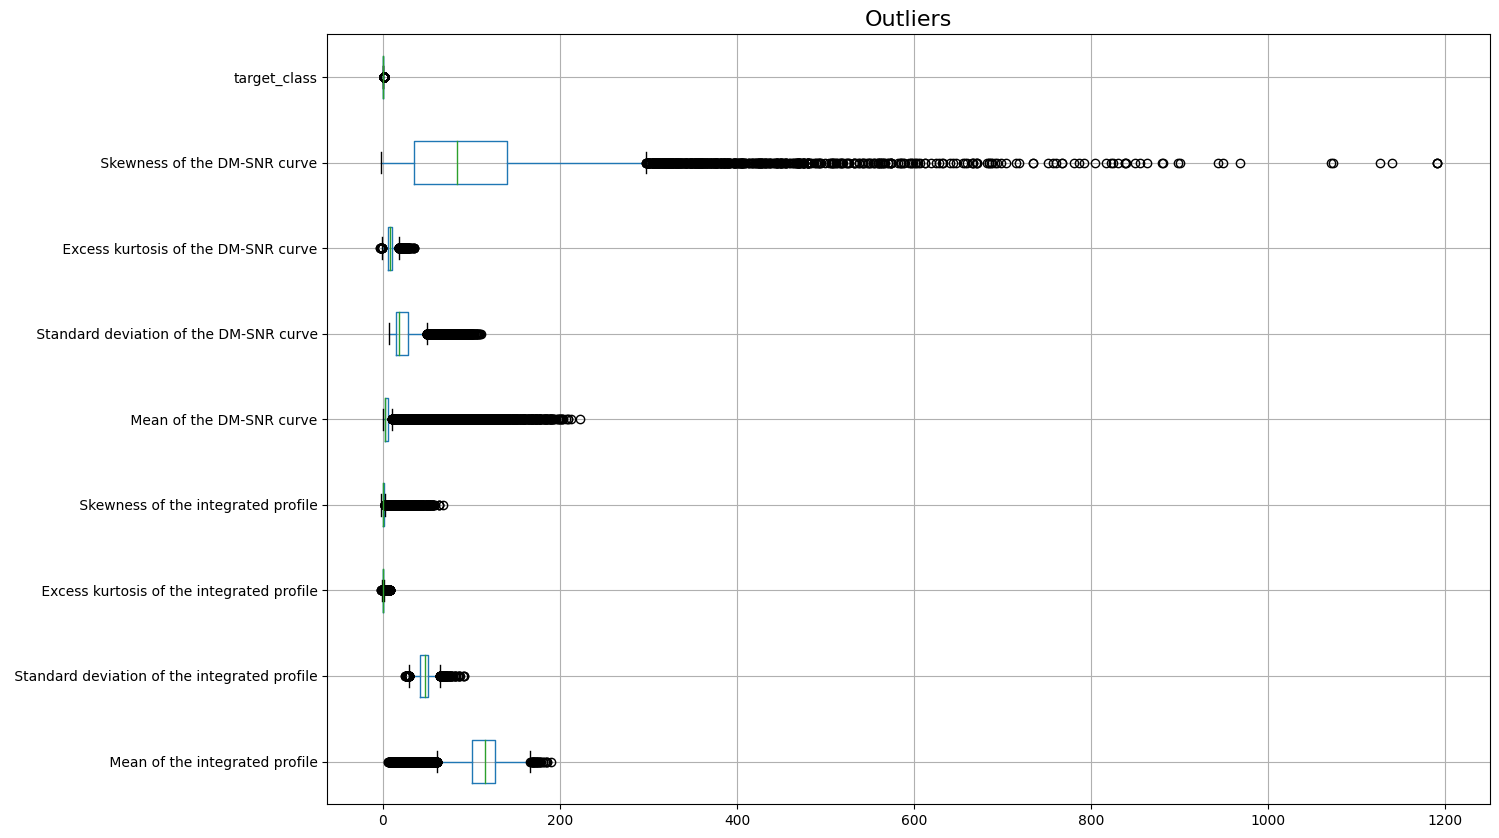

In [17]:
plt.figure(figsize=(15,10))
plt.title('Outliers',fontsize=16)
df_train.boxplot(vert=0)

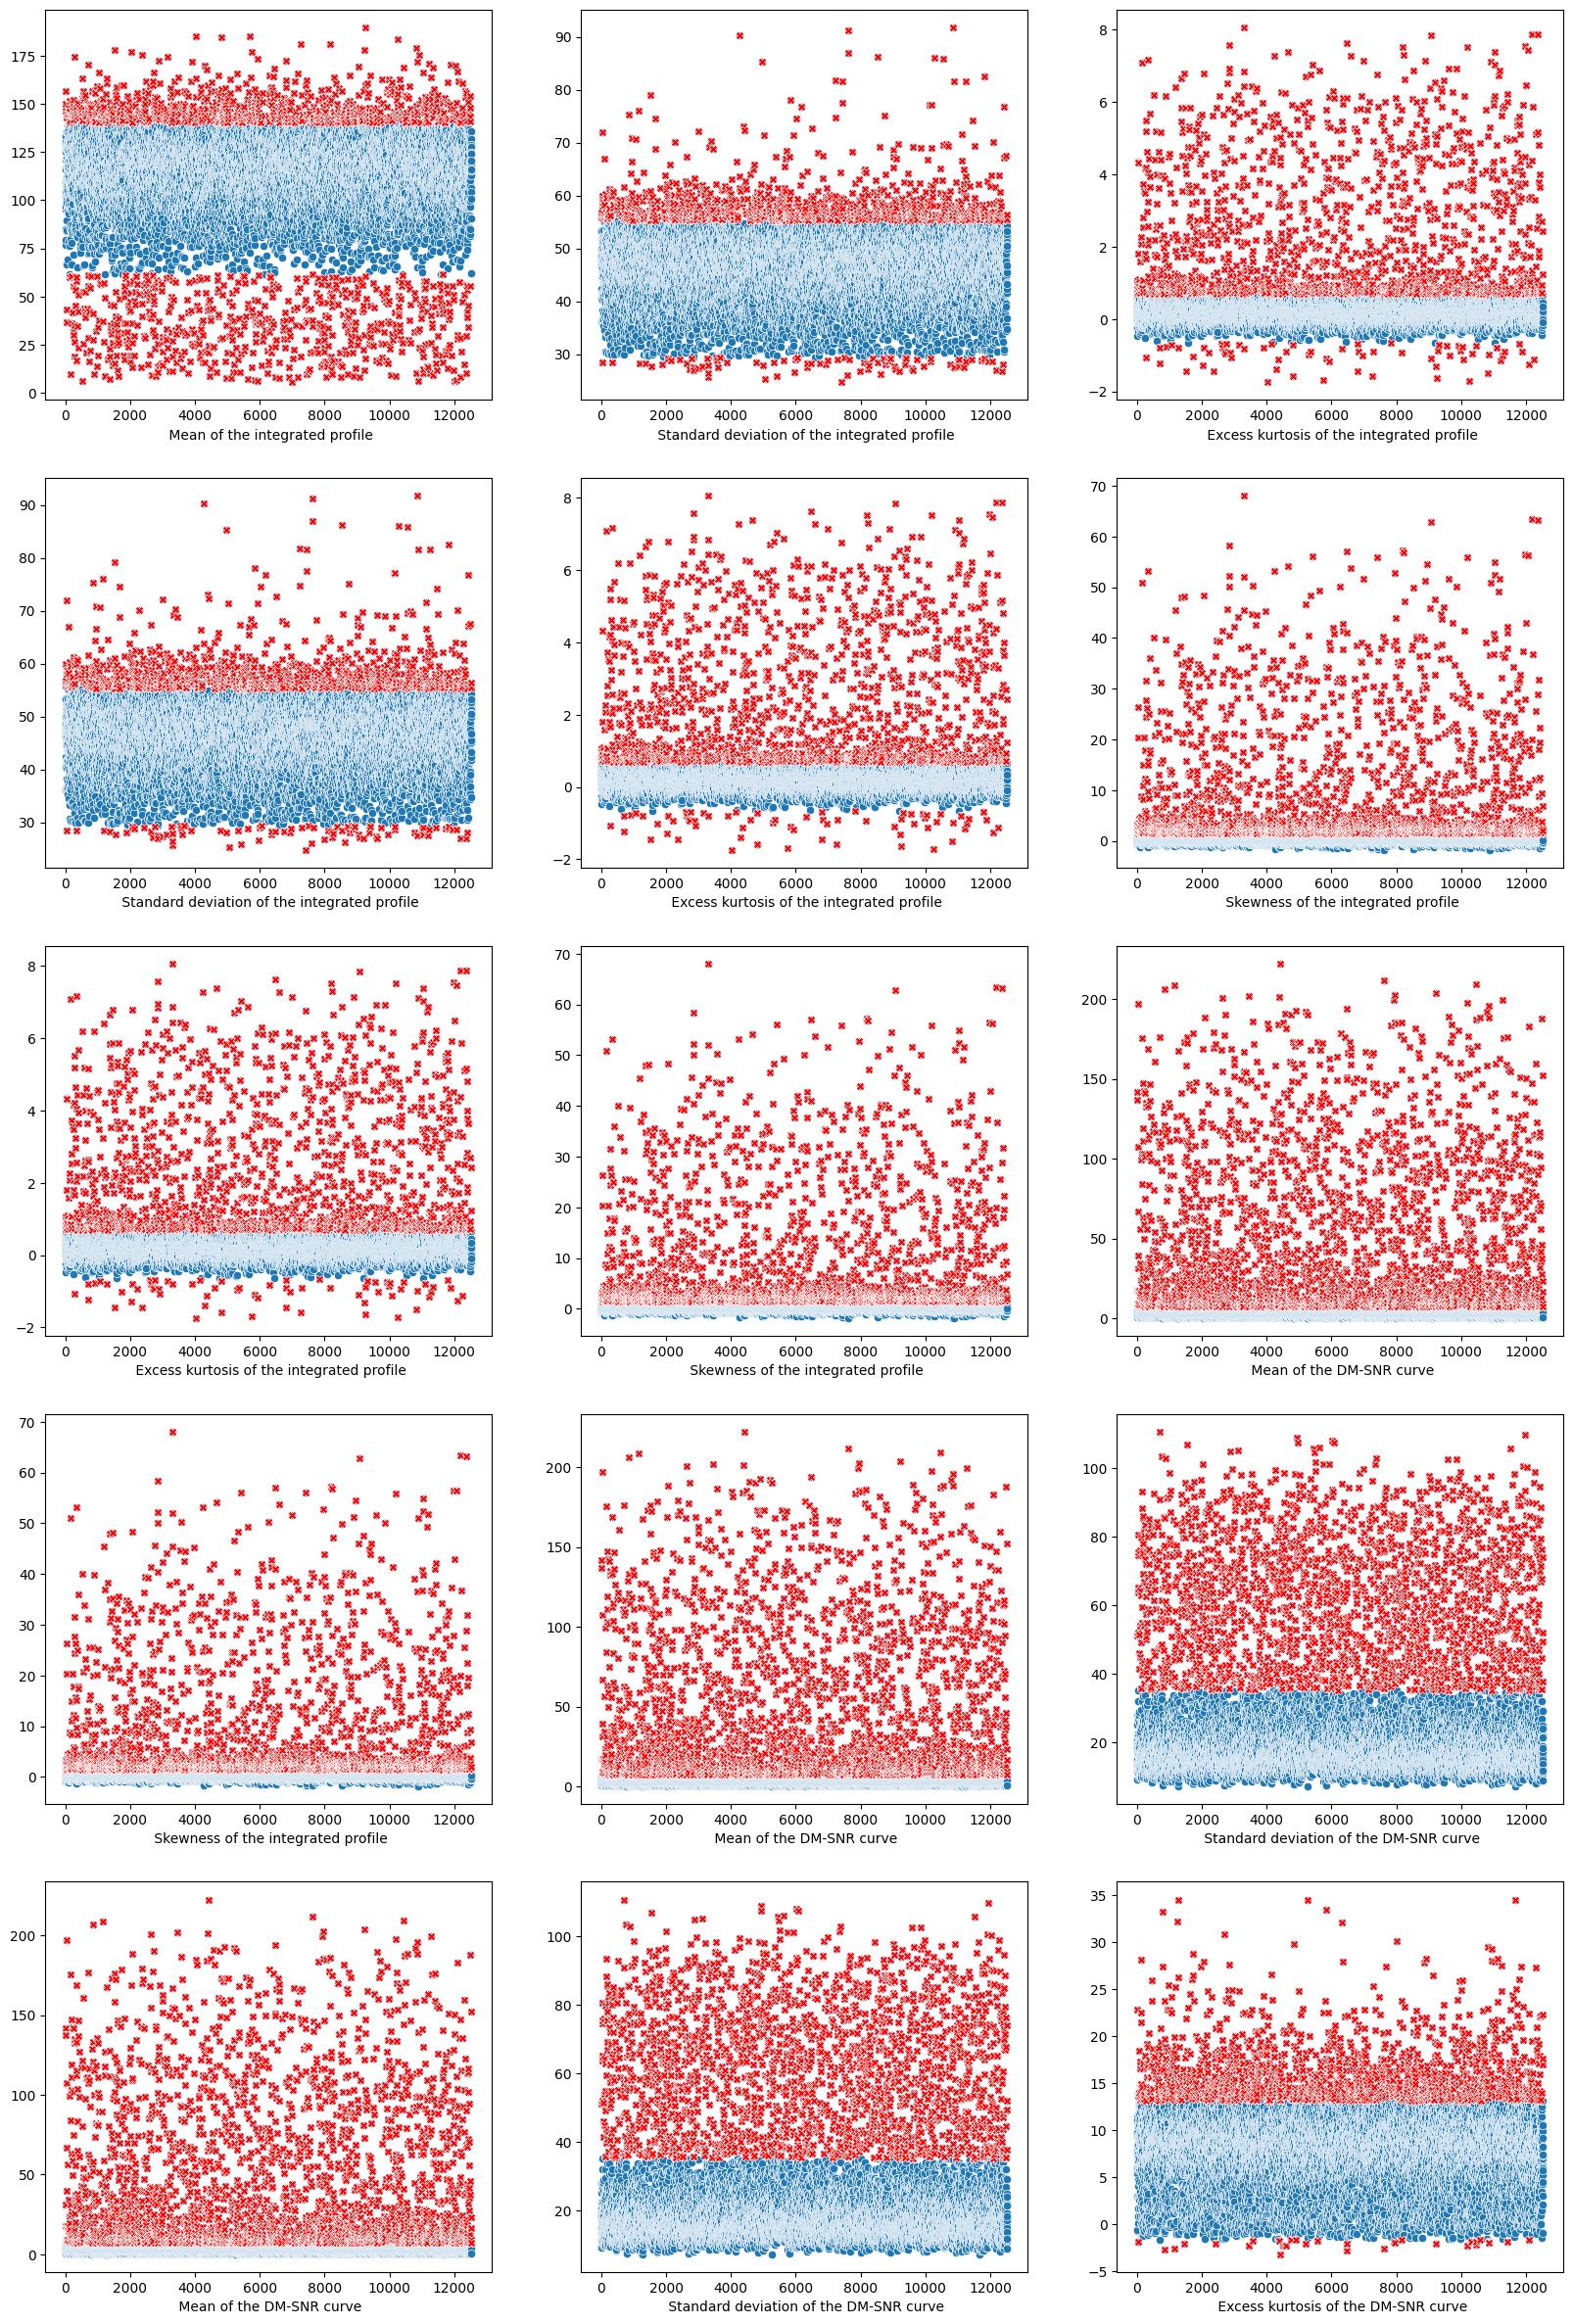

In [18]:
plot_outliers(data=df_train, columns=df_train.columns)

In [19]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
print('Training set Outliers:')
((df_train < (lower_range)) | (df_train > (upper_range))).sum()

Training set Outliers:


 Mean of the integrated profile                   717
 Standard deviation of the integrated profile     178
 Excess kurtosis of the integrated profile        973
 Skewness of the integrated profile              1340
 Mean of the DM-SNR curve                        2047
 Standard deviation of the DM-SNR curve          1506
 Excess kurtosis of the DM-SNR curve              349
 Skewness of the DM-SNR curve                     611
target_class                                     1153
dtype: int64

#### Testing Data

<Axes: title={'center': 'Outliers'}>

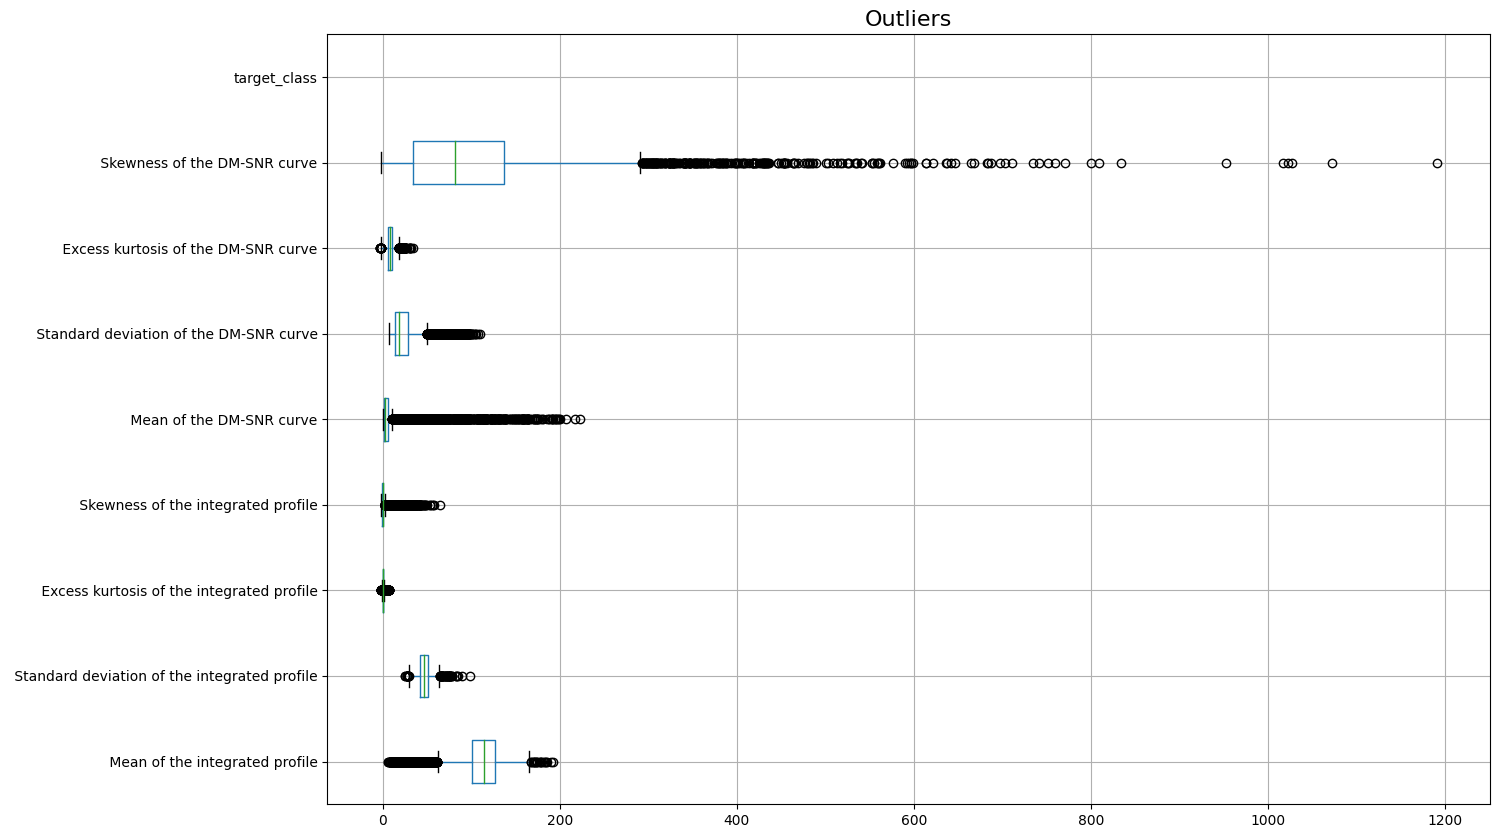

In [20]:
plt.figure(figsize=(15,10))
plt.title('Outliers',fontsize=16)
df_test.boxplot(vert=0)

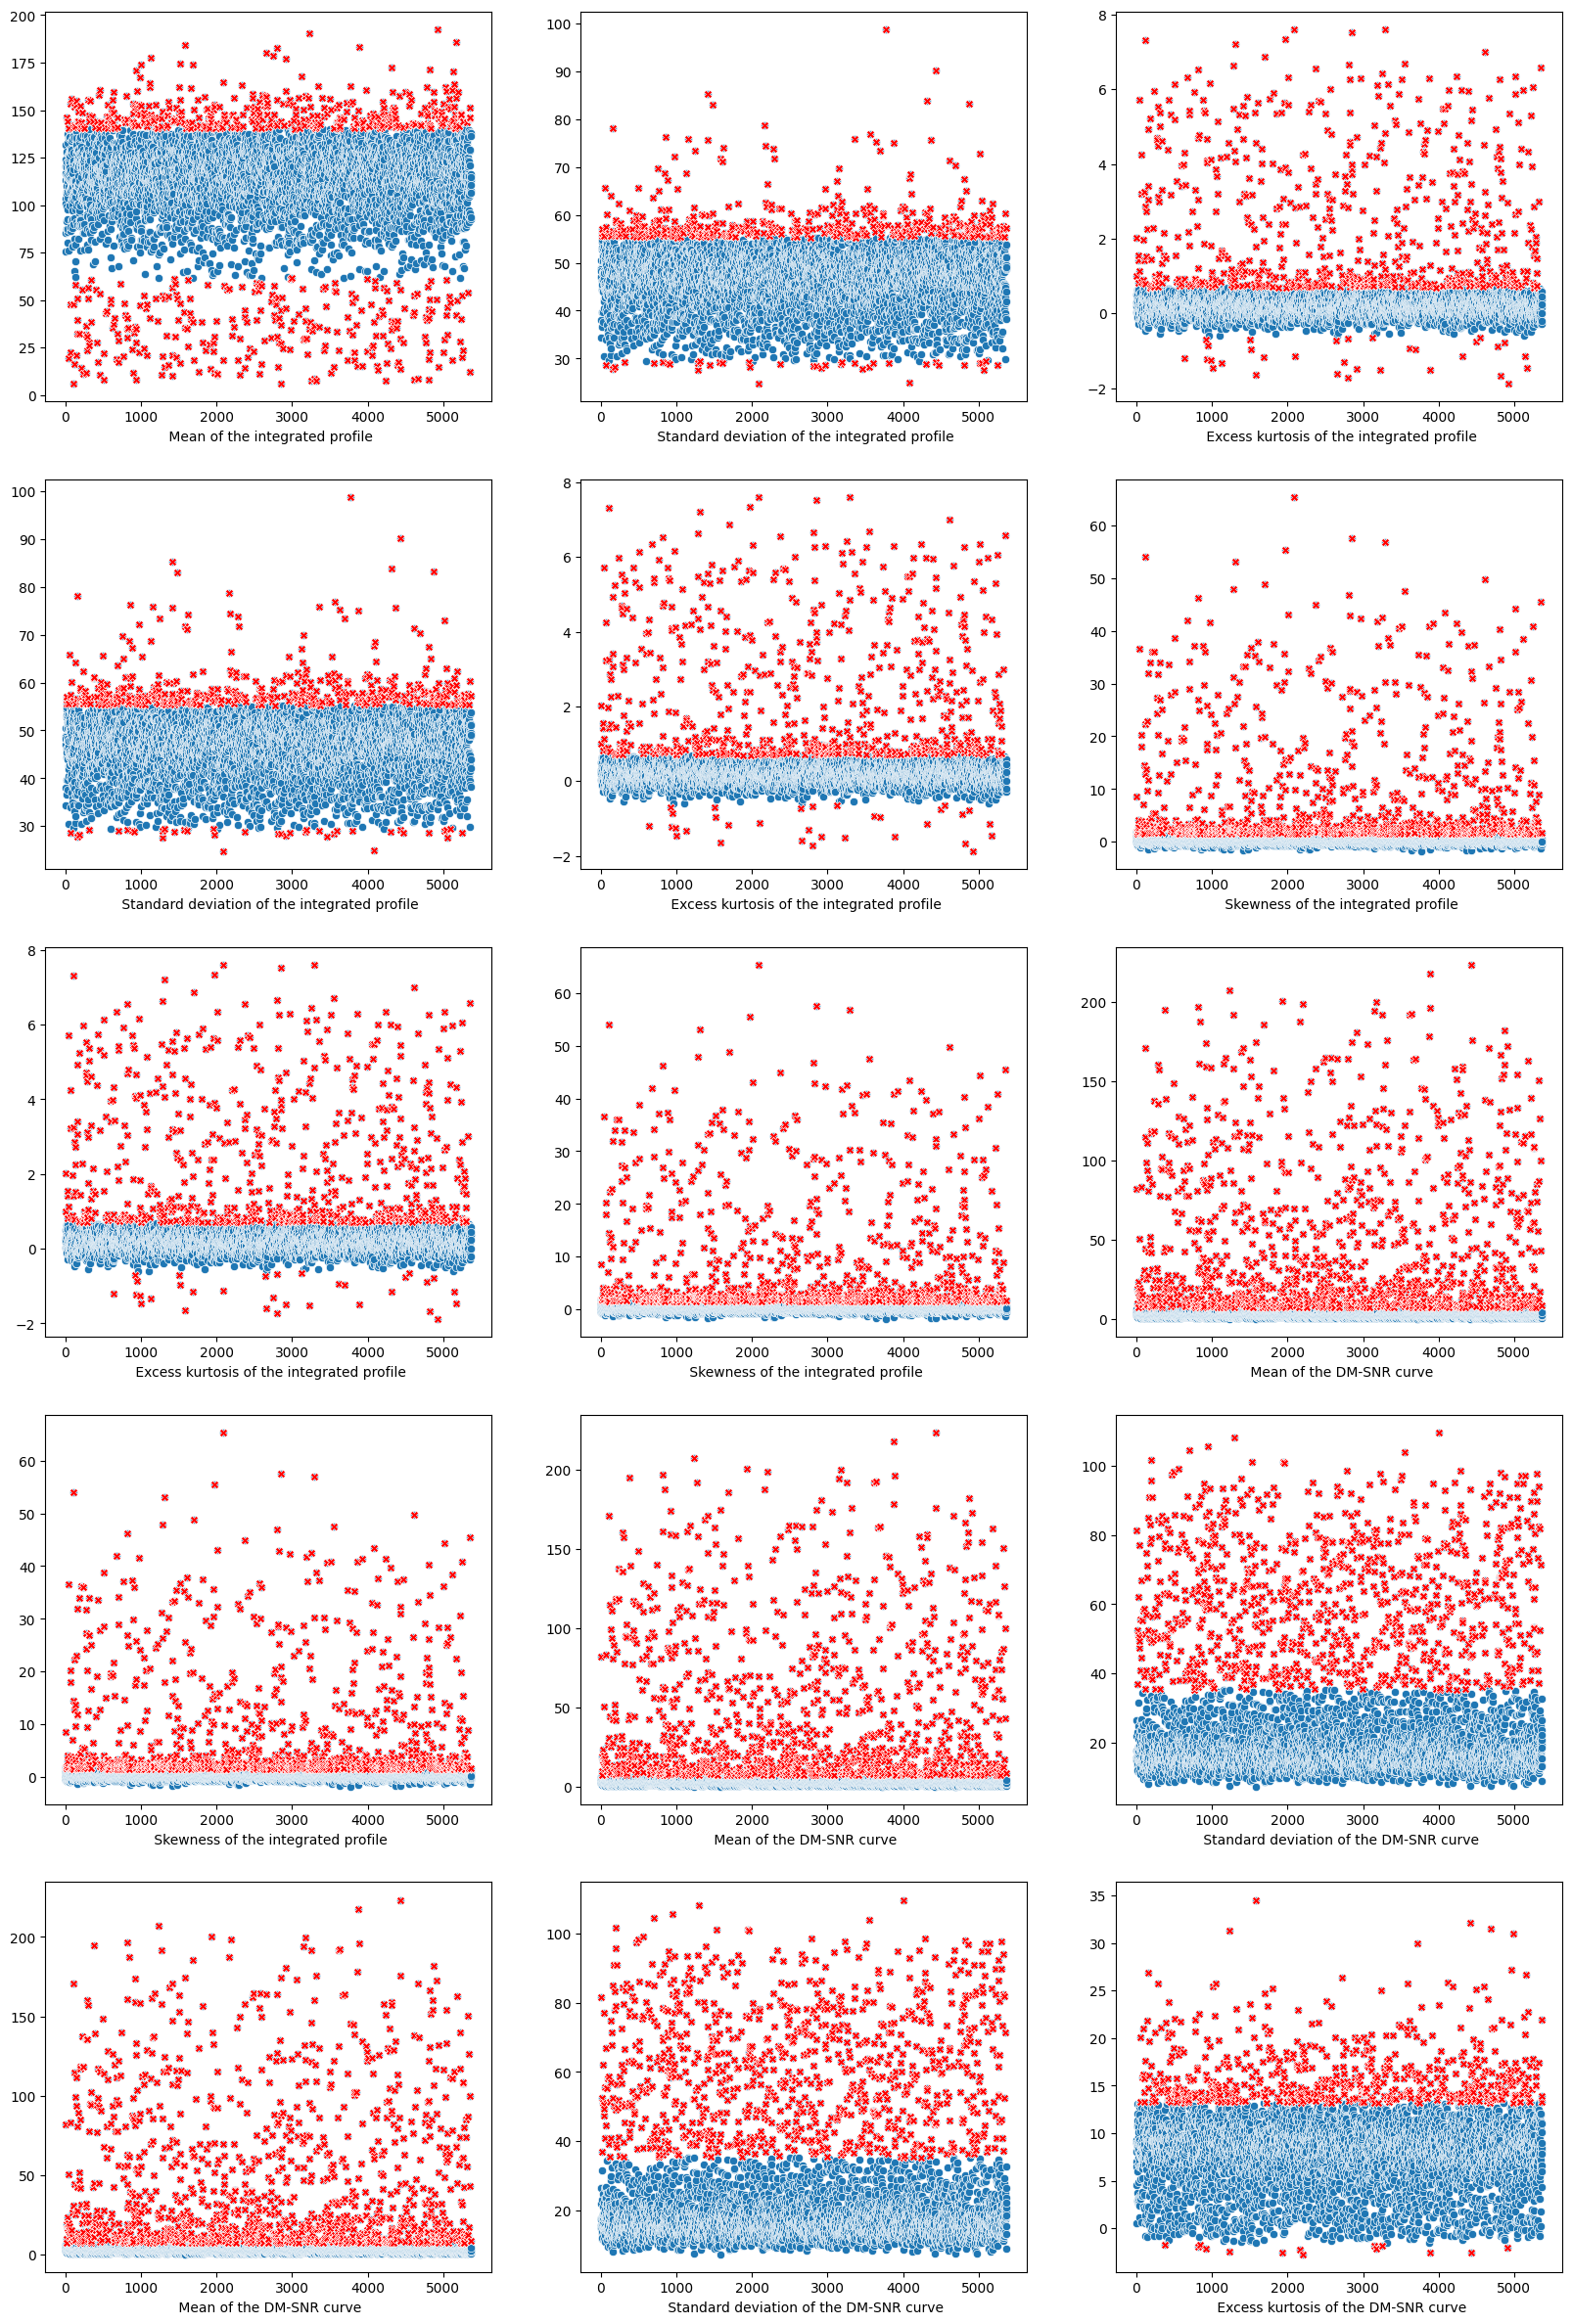

In [21]:
plot_outliers(data=df_test, columns=df_train.columns)

In [22]:
Q1 = df_test.quantile(0.25)
Q3 = df_test.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
print('Testing set Outliers:')
((df_test < (lower_range)) | (df_test > (upper_range))).sum()

Testing set Outliers:


 Mean of the integrated profile                  311
 Standard deviation of the integrated profile     81
 Excess kurtosis of the integrated profile       411
 Skewness of the integrated profile              561
 Mean of the DM-SNR curve                        880
 Standard deviation of the DM-SNR curve          631
 Excess kurtosis of the DM-SNR curve             138
 Skewness of the DM-SNR curve                    243
target_class                                       0
dtype: int64

### Distribution

#### Training Data

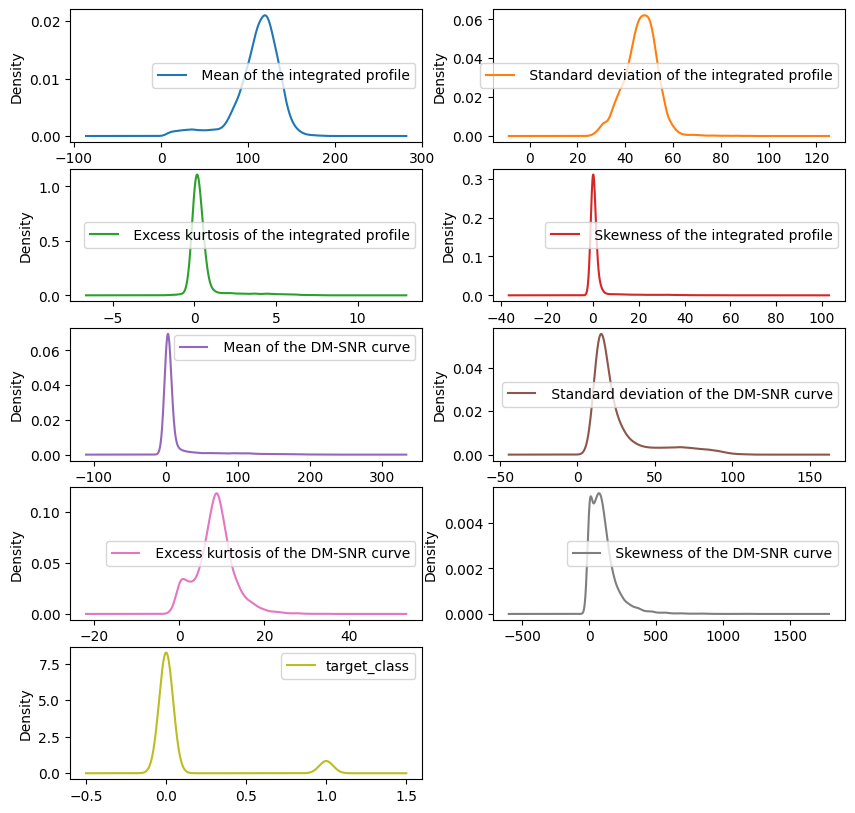

In [23]:
_ = df_train[df_train.columns].plot(kind='density', subplots=True, layout=(5, 2), sharex=False, figsize=(10, 10))

#### Testing Data

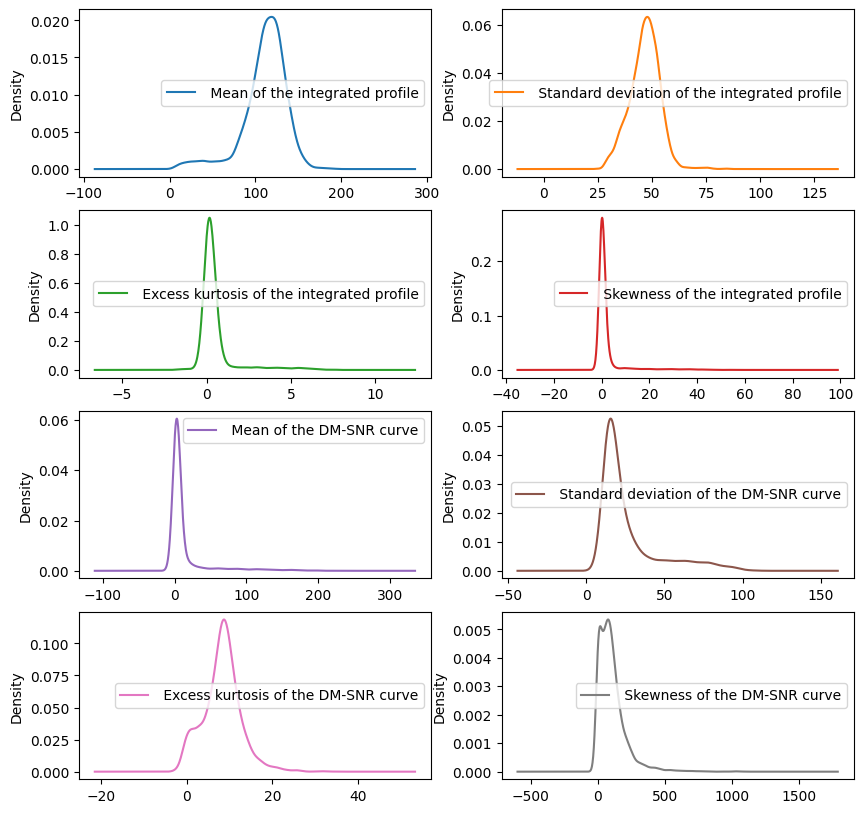

In [24]:
_ = df_test[df_test.columns[:-1]].plot(kind='density', subplots=True, layout=(4, 2), sharex=False, figsize=(10, 10))

The data is not normally distributed. Most of the variables are skewed which needs to be transformed.

###  Correlation

#### Training Data

<Axes: >

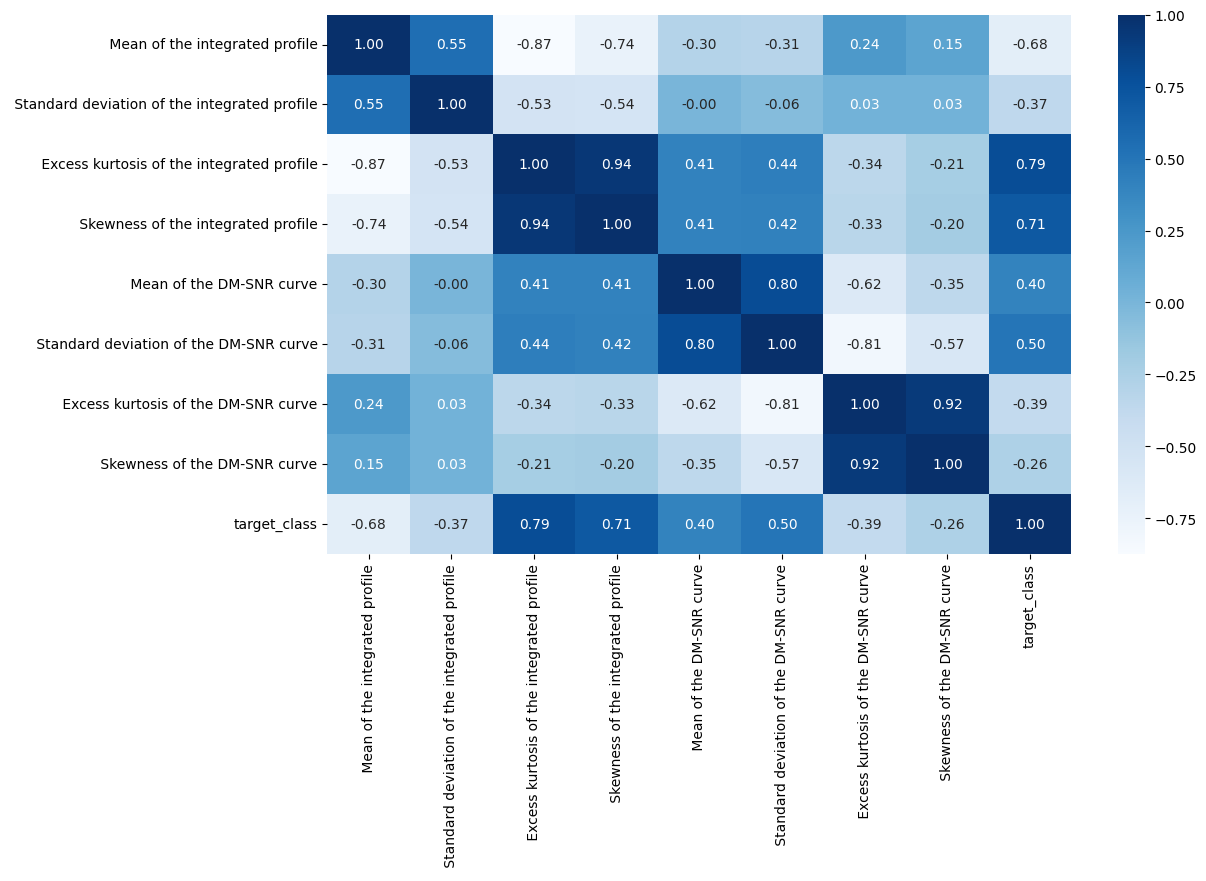

In [25]:
plt.figure(figsize=(12,7))
sns.heatmap(df_train.corr(), annot=True, fmt='.2f', cmap='Blues')

#### Testing Data

<Axes: >

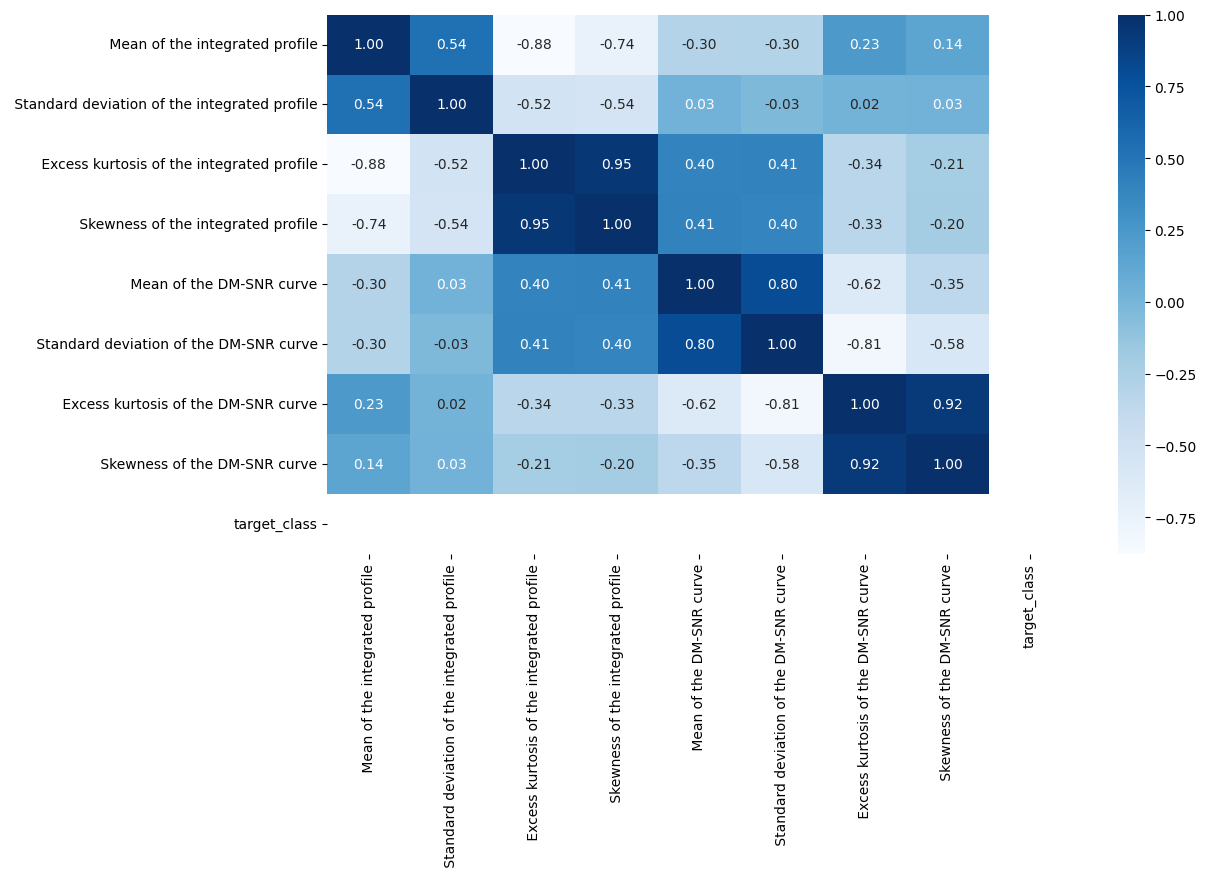

In [26]:
plt.figure(figsize=(12,7))
sns.heatmap(df_test.corr(), annot=True, fmt='.2f', cmap='Blues')

### Data Cleaning

#### Missing Valaue Treatment

##### Training Data

In [27]:
df_train.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [28]:
# Trimming the column names strings
df_train.columns = df_train.columns.map(lambda x: x.strip())
df_test.columns = df_test.columns.map(lambda x: x.strip())

In [29]:
df_train.isnull().sum()

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile       1735
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve          1178
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     625
target_class                                       0
dtype: int64

In [30]:
df_test.isnull().sum()

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile        767
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve           524
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     244
target_class                                    5370
dtype: int64

3 Columns has missing values, we'll fill the missing values with the median.

#### Filling the null values with median

In [31]:
df_train.isnull().sum()

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile       1735
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve          1178
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     625
target_class                                       0
dtype: int64

In [32]:
df_train['Excess kurtosis of the integrated profile'].fillna(value=df_train['Excess kurtosis of the integrated profile'].median(), inplace=True)

df_train['Standard deviation of the DM-SNR curve'].fillna(value=df_train['Standard deviation of the DM-SNR curve'].median(), inplace=True)

df_train['Skewness of the DM-SNR curve'].fillna(value=df_train['Skewness of the DM-SNR curve'].median(), inplace=True)

In [33]:
df_test.isnull().sum()

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile        767
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve           524
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     244
target_class                                    5370
dtype: int64

In [34]:
df_test['Excess kurtosis of the integrated profile'].fillna(value=df_test['Excess kurtosis of the integrated profile'].median(), inplace=True)

df_test['Standard deviation of the DM-SNR curve'].fillna(value=df_test['Standard deviation of the DM-SNR curve'].median(), inplace=True)

df_test['Skewness of the DM-SNR curve'].fillna(value=df_test['Skewness of the DM-SNR curve'].median(), inplace=True)

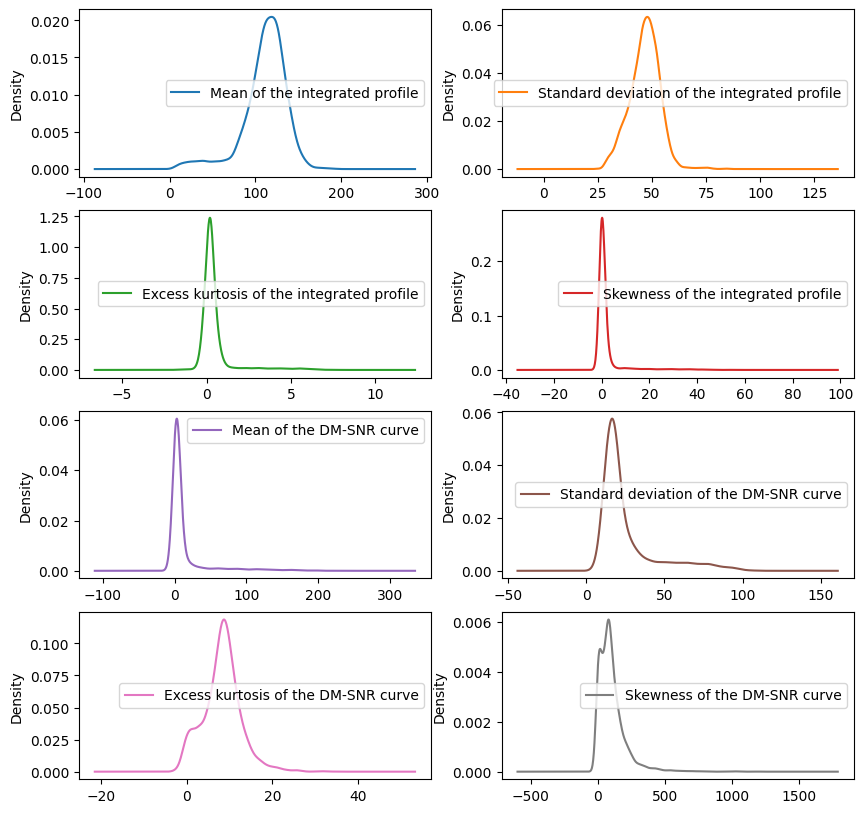

In [35]:
_ = df_test[df_test.columns[:-1]].plot(kind='density', subplots=True, layout=(4, 2), sharex=False, figsize=(10, 10))

### Removing Outliers

In [36]:
def remove_outliers(df,col):
    Q1=df[col].quantile(0.25) 
    Q3=df[col].quantile(0.75) 
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)                                                            
    return df

def remove_outliers_all(df, col_list):
    for c in col_list:
        df = remove_outliers(df,c)
    return df

#### Training Data

<Axes: title={'center': 'Outliers'}>

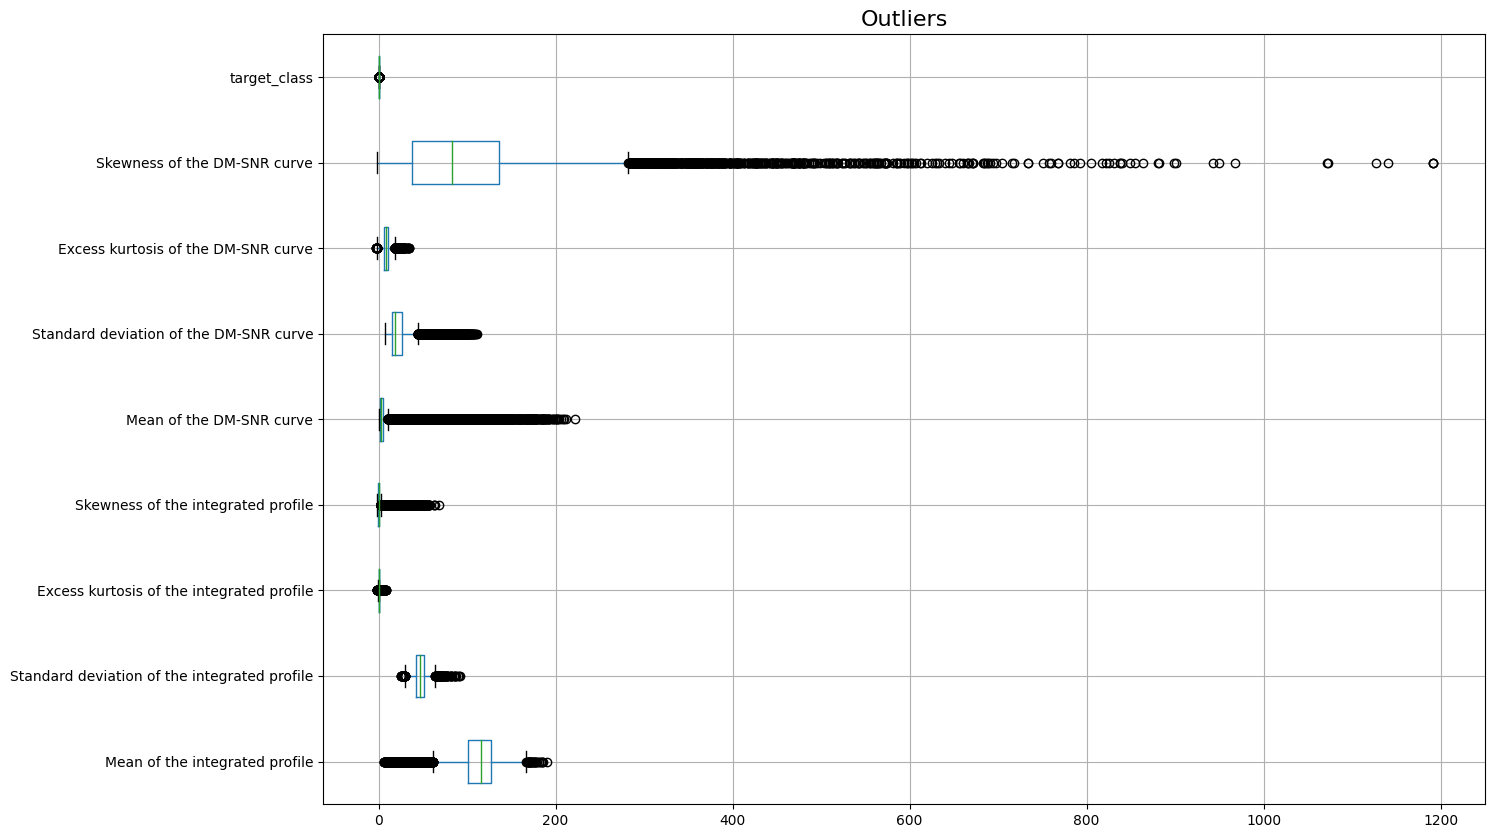

In [37]:
plt.figure(figsize=(15,10))
plt.title('Outliers',fontsize=16)
df_train.boxplot(vert=0)

In [38]:
df_train = remove_outliers_all(df_train, df_train.columns[:-1])

<Axes: title={'center': 'Outliers'}>

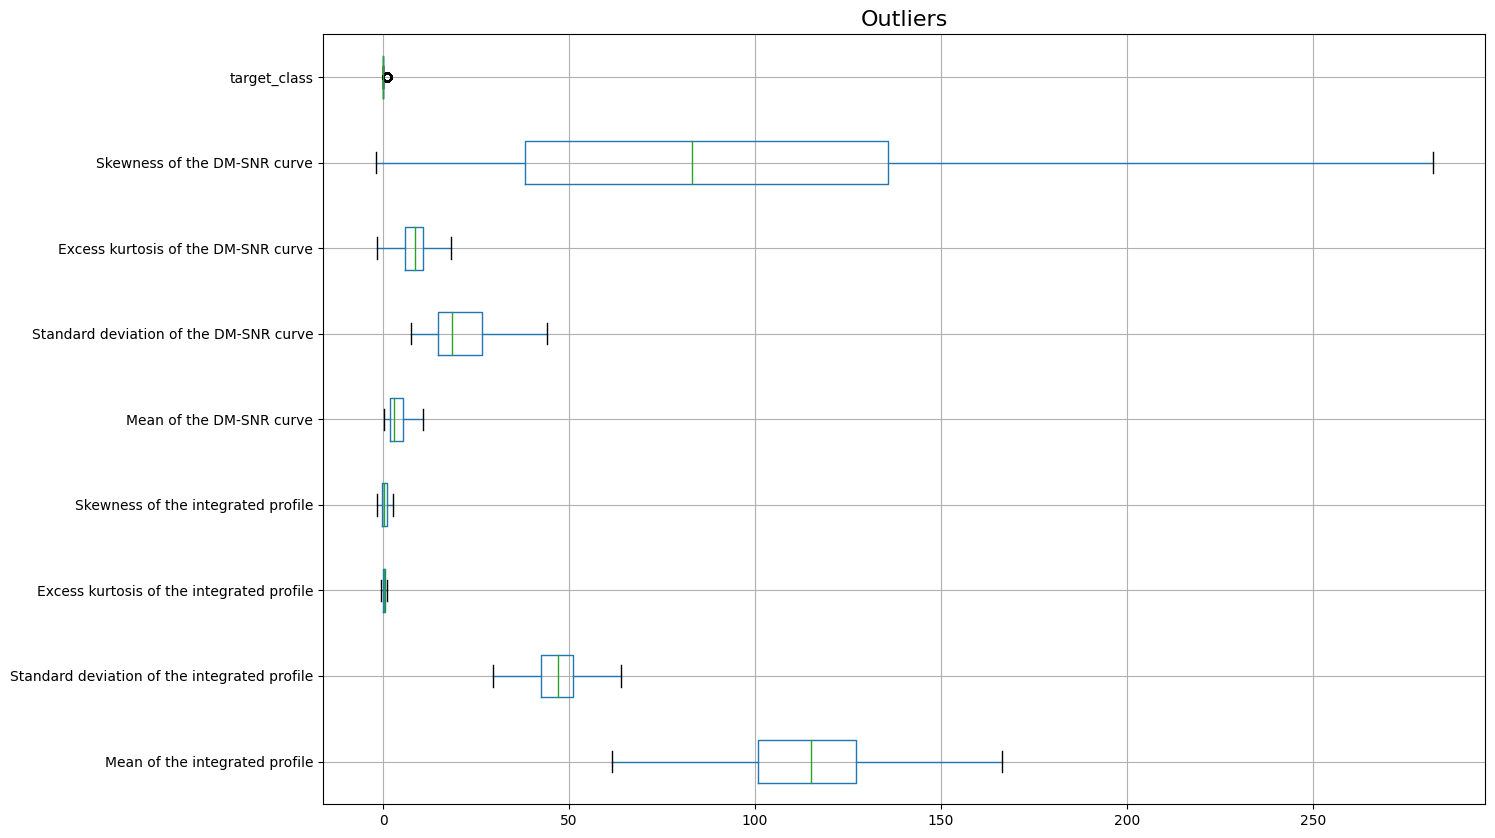

In [39]:
plt.figure(figsize=(15,10))
plt.title('Outliers',fontsize=16)
df_train.boxplot(vert=0)

#### Testing Data

<Axes: title={'center': 'Outliers'}>

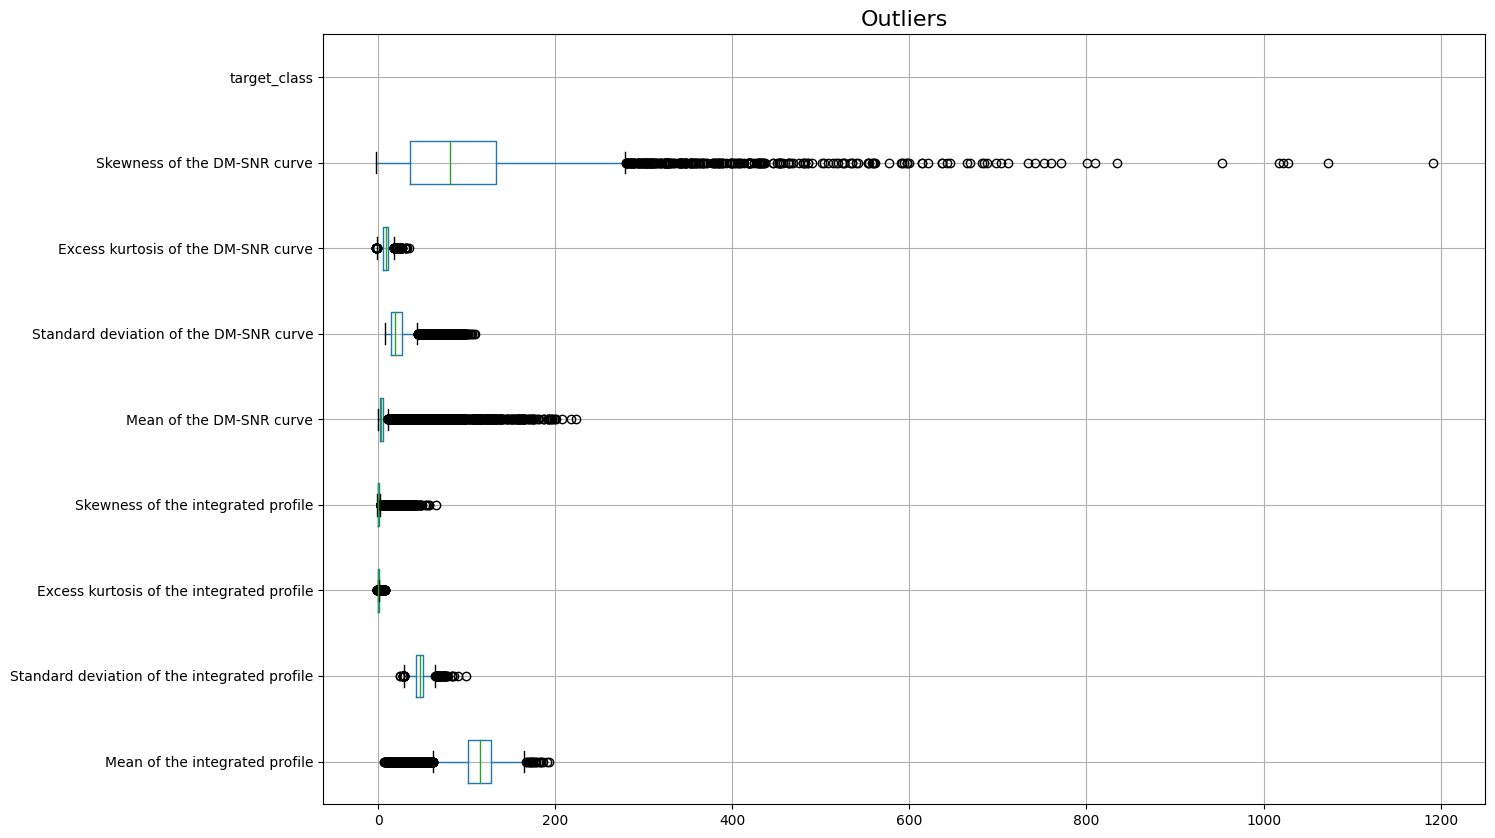

In [40]:
plt.figure(figsize=(15,10))
plt.title('Outliers',fontsize=16)
df_test.boxplot(vert=0)

In [41]:
df_test = remove_outliers_all(df_test, df_test.columns[:-1])

<Axes: title={'center': 'Outliers'}>

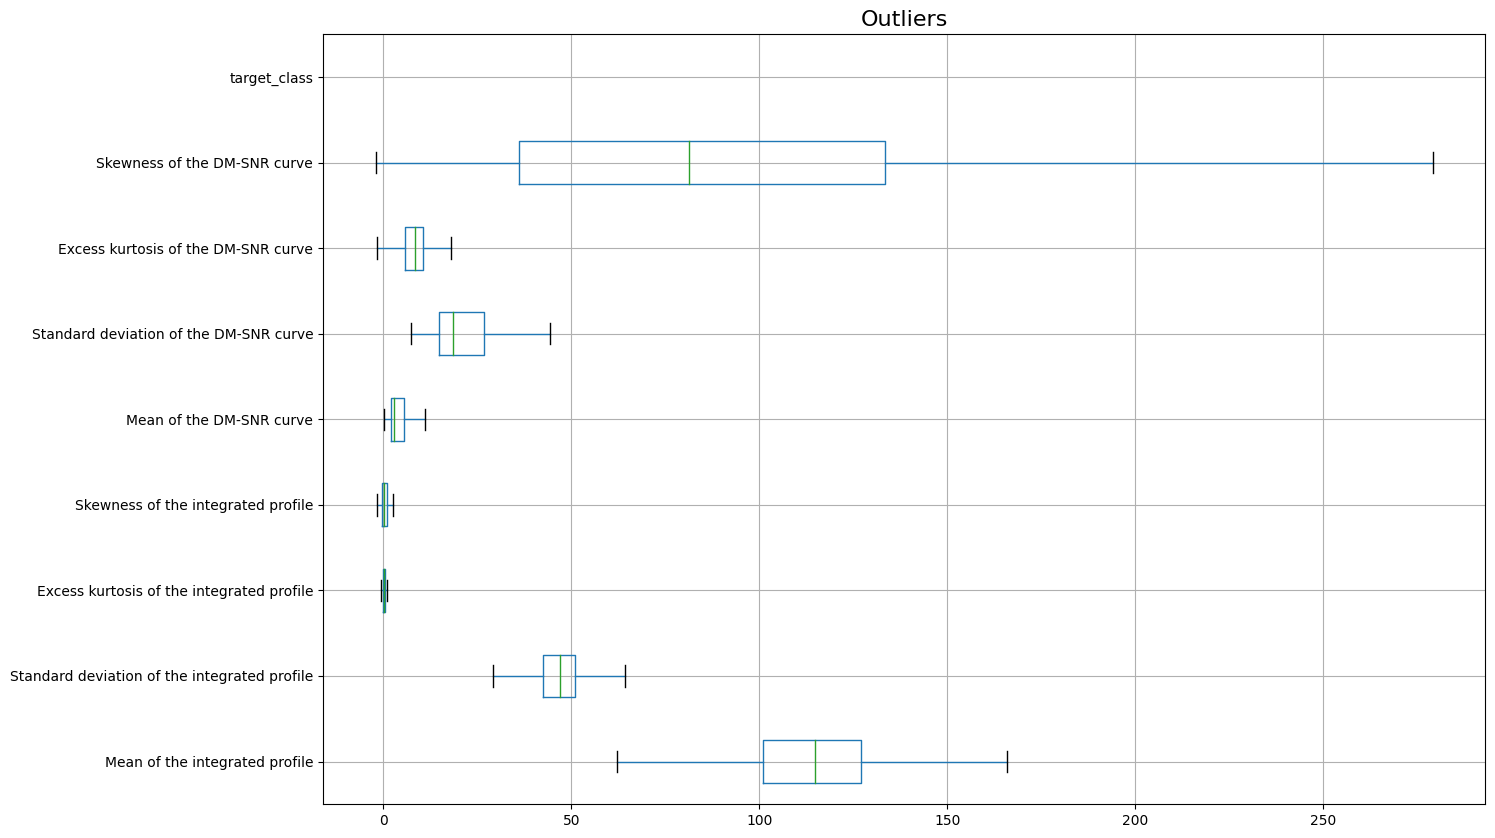

In [42]:
plt.figure(figsize=(15,10))
plt.title('Outliers',fontsize=16)
df_test.boxplot(vert=0)

### Resolving Class Imbalance

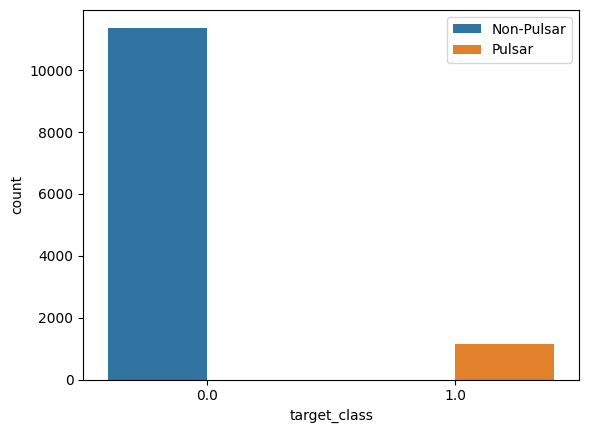

In [43]:
sns.countplot(data=df_train, x='target_class', hue='target_class')
plt.legend(labels=['Non-Pulsar','Pulsar'])

In [44]:
X_train = df_train[df_train.columns[:-1]]
X_test = df_test[df_test.columns[:-1]]

Y_train = df_train['target_class']
Y_test = df_test['target_class']

#### Training Data

In [45]:
smt = SMOTE()
X_res_train, y_res_train = smt.fit_resample(X_train, Y_train)

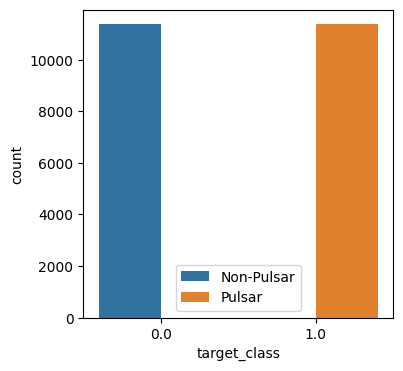

In [47]:
temp = pd.concat([X_res_train, y_res_train], axis=1)
plt.figure(figsize=(4, 4))
sns.countplot(data=temp, x='target_class', hue='target_class')
plt.legend(labels=['Non-Pulsar', 'Pulsar'], loc='lower center')

### Transformation

In [48]:
scalar = StandardScaler()
X_res_train = scalar.fit_transform(X_res_train)
X_test = scalar.transform(X_test)

## Building Models

### Splitting Training and Testing Data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_res_train, y_res_train, test_size=0.2, random_state=42)

In [50]:
print(f"Training Set Size => TrainX: {X_train.shape[0]}, TrainY: {y_train.shape[0]}")
print(f"Testing Set Size => TestX: {X_test.shape[0]}, TestY: {y_test.shape[0]}")

Training Set Size => TrainX: 18200, TrainY: 18200
Testing Set Size => TestX: 4550, TestY: 4550


In [51]:
def get_scores(model, forNN=False, getDF=False):
    '''Function to Get all the accuracy metrics of on testing dataset'''
    YPred = model.predict(X_test)
    
    if(forNN):
        accracy = accuracy_score(y_test, np.round(YPred))
        recall = recall_score(y_test, np.round(YPred))
        precision = precision_score(y_test, np.round(YPred))
        f1 = f1_score(y_test, np.round(YPred))
    else:
        accracy = model.score(X_test, y_test)
        recall = recall_score(y_test, YPred)
        precision = precision_score(y_test, YPred)
        f1 = f1_score(y_test, YPred)
        
    if getDF:
        d = {'accuracy':accracy, 'recall':recall, 'precision':precision, 'f1': f1}
        if forNN:
            return pd.DataFrame(data=d, index=['Neural Network'])
        else:
            return pd.DataFrame(data=d, index=['Decision Tree'])
        
    else:
        print(f'Accuracy: {accracy}')
        print(f'Recall Score: {recall}')
        print(f'Precision Score: {precision}')
        print(f'f1 Score: {f1}')

In [52]:
def plot_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''Function to plot confusion matrix'''
    y_predict = model.predict(X_test)
    cm=confusion_matrix( y_actual, np.round(y_predict), labels=[0, 1])
    
    labels = ['Actual - No', 'Actual - Yes'];
    df_cm = pd.DataFrame(cm, index = labels, columns = labels)
    
    counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    percentages = ["{0:.2%}".format(value) for value in (cm.flatten()/np.sum(cm))]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(counts, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(df_cm, annot=labels, cmap='crest', fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [53]:
def export_tree_to_image(model, name, view=False):
    graph = Source(tree.export_graphviz(model,filled=True, out_file=None, feature_names=df_train.columns[:-1]))
    graph.format = 'png'
    graph.render(name,view=view)

### Decision Tree

In [54]:
dtree = DecisionTreeClassifier(random_state=42, criterion='entropy')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

Accuracy: 0.9531868131868132
Recall Score: 0.9612472160356348
Precision Score: 0.9448336252189142
f1 Score: 0.9529697504967986


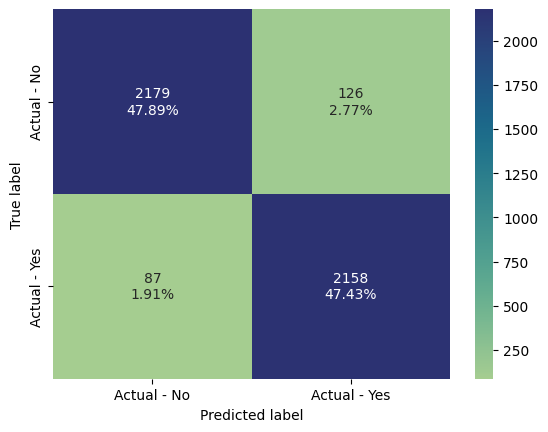

In [55]:
get_scores(dtree)
plot_confusion_matrix(dtree, y_test)

In [56]:
export_tree_to_image(dtree, 'pulsar_tree_before_pruning')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.71636 to fit


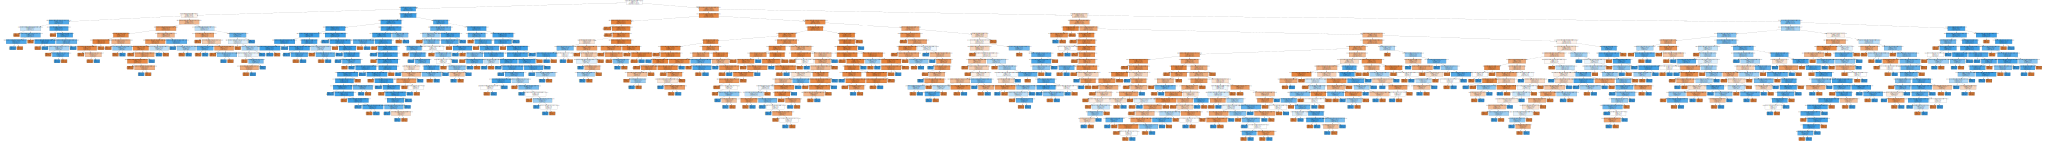

In [57]:
graph = Source(tree.export_graphviz(dtree, filled=True, feature_names=df_train.columns[:-1]))
SVG(graph.pipe(format='svg'))

### Decision Tree with pruning with RandomizedSearchCV 

In [58]:
parameters = {
    'max_features' : [4,5,6],
     'max_depth' : [20,30,40],
     'min_samples_leaf' : [100,200,300],
     'min_samples_split' : [300, 400, 500],
     "criterion": ["gini", "entropy"]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=parameters,
    cv=5, n_jobs=-1, verbose=True
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Parameters for DecisionTree: {best_params}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters for DecisionTree: {'criterion': 'gini', 'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 100, 'min_samples_split': 300}


### Decision Tree With Best Parameters

In [59]:
dtree_best = grid_search.best_estimator_
dtree_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=100,
                       min_samples_split=300)

Accuracy: 0.9325274725274725
Recall Score: 0.9131403118040089
Precision Score: 0.9481961147086031
f1 Score: 0.9303380984796914


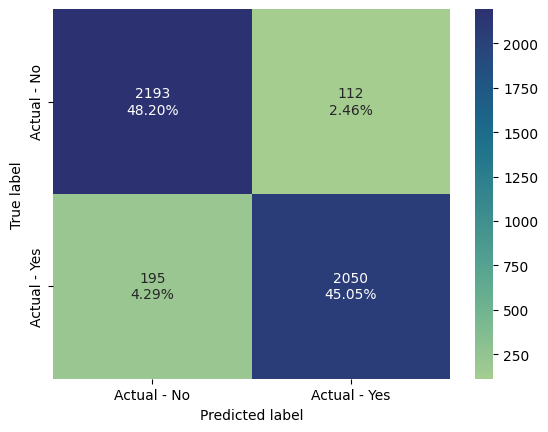

In [60]:
get_scores(dtree_best)
plot_confusion_matrix(dtree_best, y_test)

In [61]:
export_tree_to_image(dtree_best, 'pulsar_tree_after_pruning')

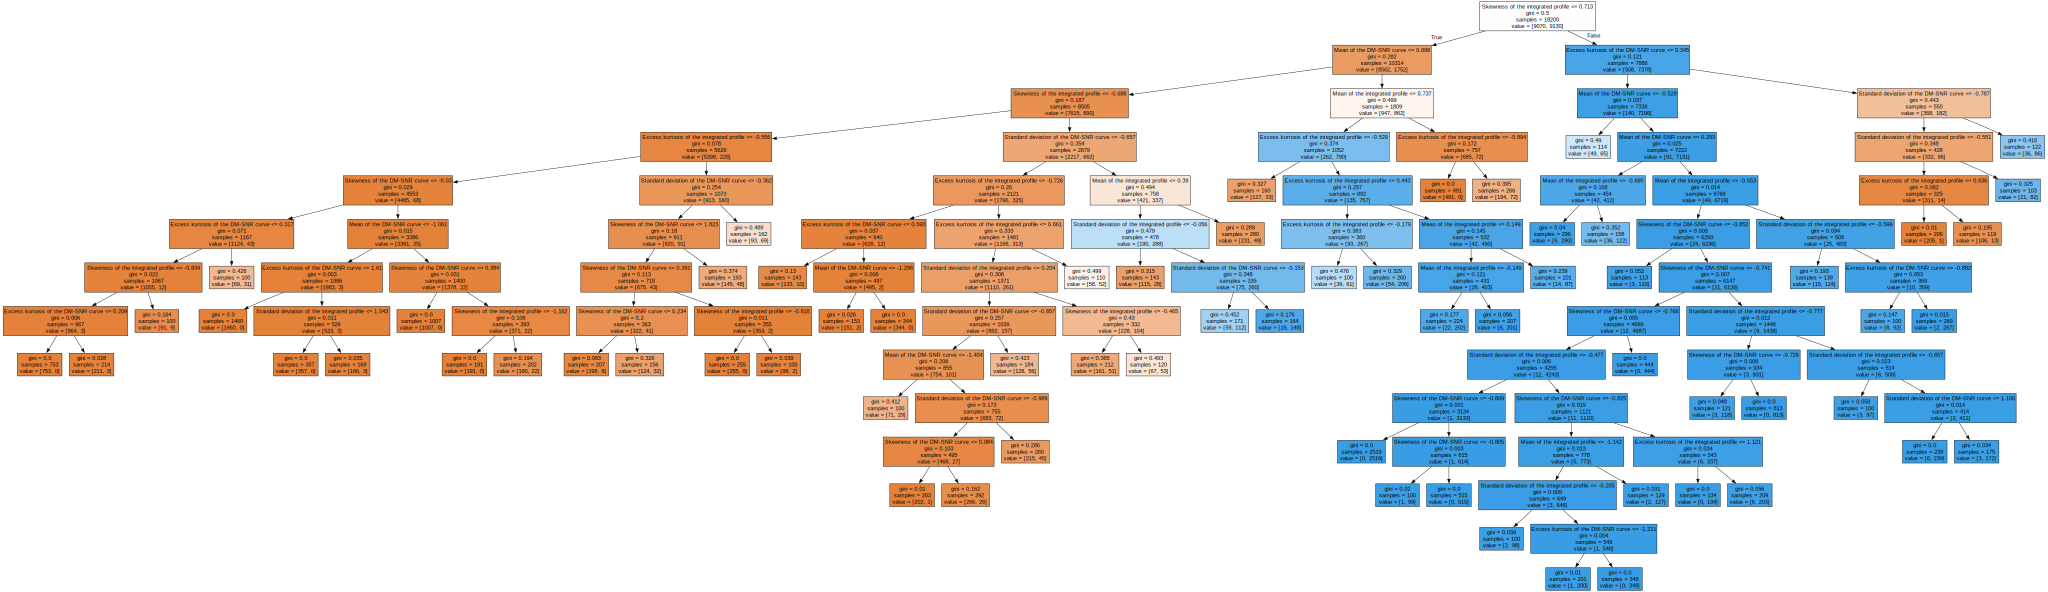

In [62]:
graph = Source(tree.export_graphviz(dtree_best, filled=True, feature_names=df_train.columns[:-1]))
SVG(graph.pipe(format='svg'))

### Neural Network

In [63]:
nn_model = Sequential()
nn_model.add(Dense(6, activation='relu', input_dim=8))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train, verbose=1, validation_split=0.1, use_multiprocessing=True, epochs=10)



Epoch 1/10


C:\Users\tapas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]




512/512 [==============================] - 2s 2ms/step - loss: 0.4265 - accuracy: 0.7985 - val_loss: 0.2574 - val_accuracy: 0.9181
Epoch 2/10
512/512 [==============================] - 1s 2ms/step - loss: 0.2166 - accuracy: 0.9216 - val_loss: 0.2248 - val_accuracy: 0.9203
Epoch 3/10
512/512 [==============================] - 1s 2ms/step - loss: 0.1991 - accuracy: 0.9235 - val_loss: 0.2165 - val_accuracy: 0.9209
Epoch 4/10
512/512 [==============================] - 1s 2ms/step - loss: 0.1930 - accuracy: 0.9253 - val_loss: 0.2117 - val_accuracy: 0.9220
Epoch 5/10
512/512 [==============================] - 1s 2ms/step - loss: 0.1894 - accuracy: 0.9275 - val_loss: 0.2086 - val_accuracy: 0.9225
Epoch 6/10
512/512 [==============================] - 1s 2ms/step - loss: 0.1871 - accuracy: 0.9287 - val_loss: 0.2063 - val_accuracy: 0.9225
Epoch 7/10
512/512 [==============================] - 1s 2ms/step - loss: 0.1849 - accuracy: 0.9297 - val_loss: 0.2040 - val_accuracy: 0.9253
Epoch 8/10
512/

In [64]:
nn_model = Sequential()
nn_model.add(Dense(10, activation='relu'))
nn_model.add(Dense(5, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train, batch_size=16, verbose=1, use_multiprocessing=True, epochs=35)

Epoch 1/35
1138/1138 [==============================] - 3s 2ms/step - loss: 0.2606 - accuracy: 0.9027
Epoch 2/35
1138/1138 [==============================] - 2s 2ms/step - loss: 0.1963 - accuracy: 0.9263
Epoch 3/35
1138/1138 [==============================] - 3s 2ms/step - loss: 0.1900 - accuracy: 0.9285
Epoch 4/35
1138/1138 [==============================] - 2s 2ms/step - loss: 0.1843 - accuracy: 0.9307
Epoch 5/35
1138/1138 [==============================] - 2s 2ms/step - loss: 0.1799 - accuracy: 0.9321
Epoch 6/35
1138/1138 [==============================] - 2s 2ms/step - loss: 0.1765 - accuracy: 0.9324
Epoch 7/35
1138/1138 [==============================] - 2s 2ms/step - loss: 0.1736 - accuracy: 0.9341
Epoch 8/35
1138/1138 [==============================] - 2s 2ms/step - loss: 0.1706 - accuracy: 0.9360
Epoch 9/35
1138/1138 [==============================] - 2s 2ms/step - loss: 0.1687 - accuracy: 0.9358
Epoch 10/35
1138/1138 [==============================] - 3s 3ms/step - loss: 0.167

<Axes: xlabel='Epochs'>

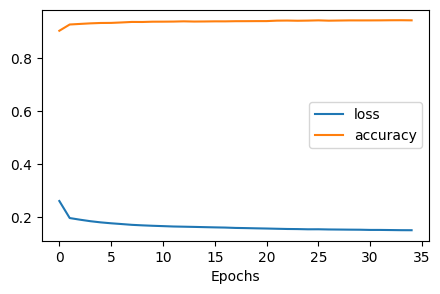

In [65]:
loss_acc = pd.DataFrame(nn_model.history.history)
loss_acc[['loss', 'accuracy']].plot(figsize=(5,3), xlabel='Epochs')

143/143 [==============================] - 0s 1ms/step


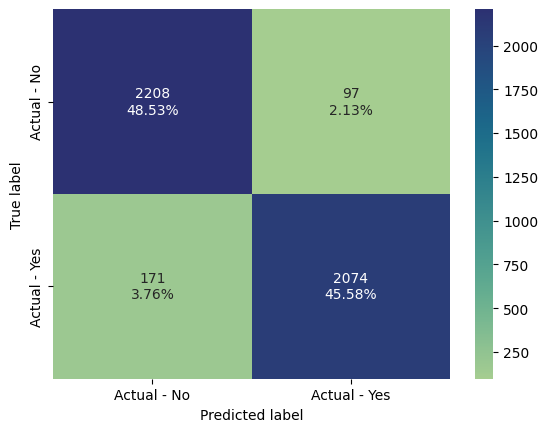

In [66]:
plot_confusion_matrix(nn_model, y_test)

In [67]:
get_scores(nn_model, forNN=True)

143/143 [==============================] - 0s 2ms/step
Accuracy: 0.9410989010989012
Recall Score: 0.9238307349665924
Precision Score: 0.9553201289728236
f1 Score: 0.9393115942028984


### Model Comparison

In [68]:
comparison_df = pd.concat([get_scores(dtree_best, getDF=True), get_scores(nn_model, forNN=True, getDF=True)], axis=0)

143/143 [==============================] - 0s 2ms/step


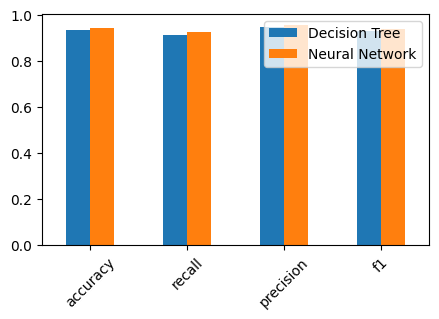

In [69]:
comparison_df.T.plot(kind='bar', figsize=(5,3))
_ = plt.xticks(rotation=45)

## Saving Model

In [70]:
# Save decision tree model
joblib.dump(dtree_best, 'models/pulsar_star_decision_tree_model.pkl')

# Save neural network model
save_model(nn_model, 'models/pulsar_star_neural_network_model.keras')

### Reference
1. For visualization of outliers: [Detect and Remove Outliers using Python by Aman Kharwal](https://thecleverprogrammer.com/2023/07/26/detect-and-remove-outliers-using-python/)
2. For hyperparameter tuning [Hyper Parameter Tuning (GridSearchCV Vs RandomizedSearchCV)](https://medium.com/analytics-vidhya/hyper-parameter-tuning-gridsearchcv-vs-randomizedsearchcv-499862e3ca5)